In [ ]:
# prompt: how to connect kaggle dataset

!pip install kaggle

# Upload your kaggle.json file
from google.colab import files
files.upload()

# Make a directory named kaggle and move kaggle.json file to that directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

# prompt: how to unzip kaggle dataset with name /content/fruits-and-vegetables-detector-36
!unzip /content/fruit-and-vegetable-image-recognition.zip -d /content/fruits-and-vegetables-detector-36

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [01:40<00:00, 19.3MB/s]
100% 1.98G/1.98G [01:40<00:00, 21.3MB/s]
Archive:  /content/fruit-and-vegetable-image-recognition.zip
  inflating: /content/fruits-and-vegetables-detector-36/test/apple/Image_1.jpg  
  inflating: /content/fruits-and-vegetables-detector-36/test/apple/Image_10.jpg  
  inflating: /content/fruits-and-vegetables-detector-36/test/apple/Image_2.jpg  
  inflating: /content/fruits-and-vegetables-detector-36/test/apple/Image_3.jpg  
  inflating: /content/fruits-and-vegetables-detector-36/test/apple/Image_4.jpg  
  inflating: /content/fruits-and-vegetables-detector-36/test/apple/Image_5.jpg  
  inflating: /content/fruits-and-vegetables-detector-36/test/apple/Image_6.JPG  
  inflating: /content/fruits-and-vegetables-detector-36/test/apple/Image_7.jpg  
  inflating: /content/fruits-and-vegetables-detector-36/test

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG16 ,MobileNetV2

# Create an ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale images to [0, 1]
    rotation_range=20,  # Randomly rotate images by up to 30 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20%
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20%
    shear_range=0.2,  # Randomly shear images
    zoom_range=0.2,  # Randomly zoom in or out
    fill_mode='nearest'  # Fill mode for padding (e.g., 'nearest' for nearest neighbor)
)

valid_datagen = ImageDataGenerator(rescale=1./255)

# Create the train generator
train_generator = train_datagen.flow_from_directory(
    directory='/content/fruits-and-vegetables-detector-36/train',
    subset='training',
    batch_size=64,
    shuffle=True,
    target_size=(224, 224),
    class_mode='categorical',
    seed=42
)

# Create the validation generator
validation_generator = valid_datagen.flow_from_directory(
    directory='/content/fruits-and-vegetables-detector-36/validation',
    subset=None,
    batch_size=64,
    shuffle=False,
    target_size=(224, 224),
    class_mode='categorical'

)

# Create the validation generator
test_generator = valid_datagen.flow_from_directory(
    directory='/content/fruits-and-vegetables-detector-36/test',
    subset=None,
    batch_size=64,
    shuffle=False,
    target_size=(224, 224),
    class_mode='categorical'
)

Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.
Found 359 images belonging to 36 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation, Input
from tensorflow.keras.optimizers import Adam

# Create the base model with a specific input shape
input_shape = (224, 224, 3)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model's layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new Sequential model
model = Sequential([
    Input(shape=input_shape),  # Explicitly define the input shape
    base_model,
    Flatten(),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dense(36, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model's input shape
print(model.input_shape)

# Try to display the model summary
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(None, 224, 224, 3)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,028,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,291,428 (39.26 MB)

 Trainable params: 8,033,188 (30.64 MB)

 Non-trainable params: 2,258,240 (8.61 MB)

In [ ]:
import warnings
from tensorflow.keras.callbacks import EarlyStopping
warnings.filterwarnings("ignore")

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(train_generator,epochs=20,validation_data=validation_generator,callbacks=[early_stopping])

# Epoch 20/20
# 98/98 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.7356 - loss: 1.1024 - val_accuracy: 0.9345 - val_loss: 0.2859

# Epoch 20/20
# 49/49 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.8998 - loss: 0.6164 - val_accuracy: 0.9658 - val_loss: 0.2187

# Epoch 20/20
# 49/49 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.9869 - loss: 0.1287 - val_accuracy: 0.9744 - val_loss: 0.1352

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 159s 3s/step - accuracy: 0.3659 - loss: 2.5296 - val_accuracy: 0.8689 - val_loss: 0.4947
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.7773 - loss: 1.0552 - val_accuracy: 0.9174 - val_loss: 0.3590
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.8456 - loss: 0.8086 - val_accuracy: 0.9373 - val_loss: 0.3036
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.8770 - loss: 0.6575 - val_accuracy: 0.9402 - val_loss: 0.2899
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.9037 - loss: 0.5771 - val_accuracy: 0.9430 - val_loss: 0.2833
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.9264 - loss: 0.4948 - val_accuracy: 0.9544 - val_loss: 0.2603
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9410 - loss: 0.4123 - val_accuracy: 0.9573 - val_loss: 0.2528
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9517 - loss: 0.3752 - val_accuracy: 0.9630 - v

In [ ]:
from google.colab import files

model.save('FV_MobiV2.keras')
files.download('/content/FV_MobiV2.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

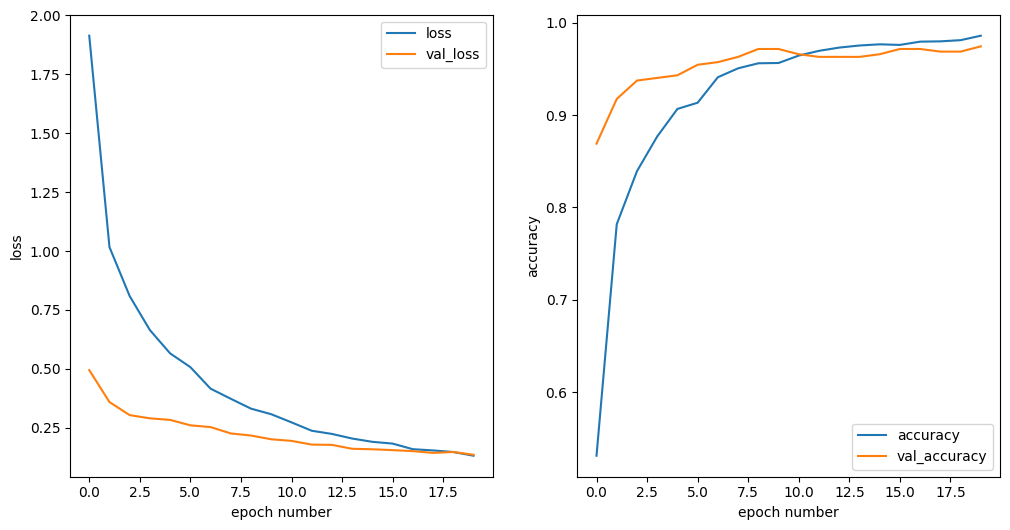

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
def plot_loss_and_accuracy(history):
    history_df = pd.DataFrame(history)
    fig, ax = plt.subplots(1,2, figsize=(12, 6))

    history_df.loc[0:, ['loss', 'val_loss']].plot(ax=ax[0])
    ax[0].set(xlabel = 'epoch number', ylabel = 'loss')

    history_df.loc[0:, ['accuracy', 'val_accuracy']].plot(ax=ax[1])
    ax[1].set(xlabel = 'epoch number', ylabel = 'accuracy')


plot_loss_and_accuracy(history.history)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px


# Classification report and confusion matrix
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')

print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

# Create confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Plot confusion matrix with annotations
cm_fig = px.imshow(cm, labels=dict(x="Predicted", y="True", color="Count"), x=list(test_generator.class_indices.keys()), y=list(test_generator.class_indices.keys()), text_auto=True)
cm_fig.update_layout(title="Confusion Matrix")
cm_fig.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
Classification Report
               precision    recall  f1-score   support

        apple       0.82      0.90      0.86        10
       banana       1.00      0.78      0.88         9
     beetroot       1.00      1.00      1.00        10
  bell pepper       0.91      1.00      0.95        10
      cabbage       1.00      1.00      1.00        10
     capsicum       1.00      0.90      0.95        10
       carrot       1.00      0.90      0.95        10
  cauliflower       1.00      1.00      1.00        10
chilli pepper       0.91      1.00      0.95        10
         corn       0.83      1.00      0.91        10
     cucumber       1.00      1.00      1.00        10
     eggplant       1.00      1.00      1.00        10
       garlic       1.00      1.00      1.00        10
       ginger       1.00      1.00      1.00        10
       grapes       1.00      1.00      1.00        10
     jalepeno       0.83      1.00      0.91        10
     